** 스마트워치 센서 데이터 기반 행동 분류 2일차 **
# --------- 과제4 : 모델 튜닝 ---------


### [미션0] 과제 이해하기
* AI 모델은 튜닝을 통해 더 높은 정확도를 도출할 수 있습니다.
* Hyperparameter Tuning 기법과 Feature Selection 기법을 사용해 더 높은 정확도를 도출해 보세요.
   - Hyperparameter Tuning: AI 모델 학습시 매개변수를 조정하여 최상의 성능을 발휘하는 매개변수를 찾는 기법
   - Feature Selection: 모델링 시 raw data의 562개나 되는 모든 feature를 사용하는 것은 computing power와 memory 측면에서 매우 비효율적이기 때문에 결과 예측에 영향도가 높은 중요 feature만 선택하여 자원을 절약하고 모델의 성능을 높이는 기법
   



※ 미션완수 조건: XGBoost 알고리즘에 Hyperparameter Tuning 기법과 Feature Selection을 사용해, 정확도가 높아지도록 모델링을 수행해 보세요.

---

### [미션1] 데이터 불러오기
* pandas, numpy, matplotlib, seaborn, os 등 데이터 분석에필요한 라이브러리와 모듈을 불러오세요.
* 라이브러리가 없을땐 !pip 명령어를 통해 라이브러리를 설치 하세요.
* 현위치 하위 'data' 폴더에서 'train_data.csv' 파일 읽어 오세요.

	- 실습순서: 라이브러리 불러오기 -> 현재 디렉토리 확인 -> train_data.csv 불러오기 -> 'subject' 제거 -> result3.csv 불러오기

In [1]:
# pandas, numpy, matplotlib, seaborn, os 등 필요 라이브러리 호출
## 데이터를 나누기 위한 sklearn.model_selection 모듈의 train_test_split 함수 사용
## 모델 성능 평가 출력을 위해 sklearn.metrics 모듈의 모든 클래스 사용
## 추가로 필요한 라이브러리는 설치/호출 하세요
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
display(os.getcwd())
display(os.listdir(os.getcwd()))
display(os.listdir('./data'))

'C:\\Users\\user\\OneDrive\\0 데이터 교육 KT AIVLE School 0 0 미니프로젝트 3차_2일차\\230921_미프3차_2일차_교육생용'

['.ipynb_checkpoints',
 '4기 DX 미프3_지도학습_교안_2일차.pdf',
 'data',
 '미프3차_A레벨_과제3-답안.ipynb',
 '미프3차_A레벨_과제3.ipynb',
 '미프3차_A레벨_과제4-답안.ipynb',
 '미프3차_A레벨_과제4.ipynb',
 '미프3차_B레벨_과제3.ipynb',
 '미프3차_B레벨_과제4.ipynb']

['features 설명.xlsx', 'features.csv', 'result3.csv', 'train_data.csv']

In [2]:
# 진행상황을 확인 하기 위한 라이브러리
from tqdm import tqdm
import time  # 예제를 위한 시간 지연 모듈

# # 반복 작업 예제
# for i in tqdm(range(10)):
#     # 여기에서 작업을 수행합니다.
#     time.sleep(0.5)  # 예제를 위한 0.5초 지연

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.00it/s]


In [3]:
# 현재 디렉토리 위치 확인
# 아래의 결과는 강사의 현재 위치(에이블러 별 다를 수 있음)
display(os.listdir(os.getcwd()))
display(os.listdir('./data'))

['.ipynb_checkpoints',
 '4기 DX 미프3_지도학습_교안_2일차.pdf',
 'data',
 '미프3차_A레벨_과제3-답안.ipynb',
 '미프3차_A레벨_과제3.ipynb',
 '미프3차_A레벨_과제4-답안.ipynb',
 '미프3차_A레벨_과제4.ipynb',
 '미프3차_B레벨_과제3.ipynb',
 '미프3차_B레벨_과제4.ipynb']

['features 설명.xlsx', 'features.csv', 'result3.csv', 'train_data.csv']

##### < data > 변수에 < train_data.csv > 할당

In [4]:
# 데이터셋 파일 불러오기
## data 변수에 train_data.csv 파일을 불러와서 할당해 주세요.
## train_data.csv 파일은 현재위치의 하위 data 폴더안에 있습니다. 
## 변수에 할당이 잘 되었는지 확인해 주세요. 
data = pd.read_csv("./data/train_data.csv")
data

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288508          -0.009196          -0.103362   
1              0.265757          -0.016576          -0.098163   
2              0.278709          -0.014511          -0.108717   
3              0.289795          -0.035536          -0.150354   
4              0.394807           0.034098           0.091229   
...                 ...                ...                ...   
5876           0.277194          -0.012389          -0.131974   
5877           0.191568           0.013328          -0.105174   
5878           0.267981          -0.018348          -0.107440   
5879           0.212787          -0.048130          -0.121001   
5880           0.283815          -0.040658          -0.138018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.988986         -0.962797         -0.967422         -0.989000   
1            -0.989551         -0.994636         -0.987435         -0.990189   
2            -0.997720         -0.981088         -0.994008         -0.997934   
3            -0.231727         -0.006412         -0.338117         -0.273557   
4             0.088489         -0.106636         -0.388502         -0.010469   
...                ...               ...               ...               ...   
5876         -0.994046         -0.940578         -0.917337         -0.994261   
5877         -0.126969         -0.121729         -0.327480         -0.192523   
5878         -0.991303         -0.989881         -0.990313         -0.992386   
5879         -0.041373          0.052449         -0.585361         -0.100714   
5880         -0.992662         -0.747190         -0.920248         -0.993410   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.962596         -0.965650         -0.929747  ...   
1            -0.993870         -0.987558         -0.937337  ...   
2            -0.982187         -0.995017         -0.942584  ...   
3             0.014245         -0.347916          0.008288  ...   
4            -0.109680         -0.346372          0.584131  ...   
...                ...               ...               ...  ...   
5876         -0.932830         -0.908088         -0.936219  ...   
5877         -0.109923         -0.295286          0.078644  ...   
5878         -0.988852         -0.991237         -0.936099  ...   
5879          0.023353         -0.554707          0.219814  ...   
5880         -0.768055         -0.924587         -0.935871  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.816696                    -0.042494   
1                           -0.693515                    -0.062899   
2                           -0.829311                     0.000265   
3                           -0.408956                    -0.255125   
4                           -0.563437                    -0.044344   
...                               ...                          ...   
5876                        -0.690363                    -0.034888   
5877                        -0.879215                     0.721718   
5878                        -0.886851                     0.060173   
5879                        -0.053556                     0.260880   
5880                        -0.696584                     0.107690   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                -0.044218                          0.307873   
1                                 0.388459                         -0.765014   
2                                -0.525022                         -0.891875   
3                                 0.612804                          0.747381   
4                                -0.845268                         -0.974650   
...                                    ...                               ...   
5876                             -0.261437                

##### < subject > 컬럼 제거

In [5]:
# 불필요한 열 제거

## 'subject'열 은 데이터를 수집한 사람을 구별하기 위한 데이터 입니다.

## 'subject'열을 data 데이터프레임 변수 에서 제거해 주세요.

## 'subject'열이 잘 제거 되었는지 확인해 주세요.

data.drop('subject', axis=1,inplace= True)

data.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288508          -0.009196          -0.103362         -0.988986   
1           0.265757          -0.016576          -0.098163         -0.989551   
2           0.278709          -0.014511          -0.108717         -0.997720   
3           0.289795          -0.035536          -0.150354         -0.231727   
4           0.394807           0.034098           0.091229          0.088489   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.962797         -0.967422         -0.989000         -0.962596   
1         -0.994636         -0.987435         -0.990189         -0.993870   
2         -0.981088         -0.994008         -0.997934         -0.982187   
3         -0.006412         -0.338117         -0.273557          0.014245   
4         -0.106636         -0.388502         -0.010469         -0.109680   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-skewness()  \
0         -0.965650         -0.929747  ...                        -0.487737   
1         -0.987558         -0.937337  ...                        -0.237820   
2         -0.995017         -0.942584  ...                        -0.535287   
3         -0.347916          0.008288  ...                        -0.004012   
4         -0.346372          0.584131  ...                        -0.157832   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.816696                    -0.042494   
1                        -0.693515                    -0.062899   
2                        -0.829311                     0.000265   
3                        -0.408956                    -0.255125   
4                        -0.563437                    -0.044344   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                             -0.044218                          0.307873   
1                              0.388459                         -0.765014   
2                             -0.525022                         -0.891875   
3                              0.612804                          0.747381   
4                             -0.845268                         -0.974650   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                              0.072790             -0.601120   
1                              0.771524              0.345205   
2                              0.021528             -0.833564   
3                             -0.072944             -0.695819   
4                             -0.887846             -0.705029   

   angle(Y,gravityMean)  angle(Z,gravityMean)            Activity  
0              0.331298              0.165163            STANDING  
1             -0.769186             -0.147944              LAYING  
2              0.202434             -0.032755            STANDING  
3              0.287154              0.111388             WALKING  
4              0.264952              0.137758  WALKING_DOWNSTAIRS  

[5 rows x 562 columns]

##### < result > 변수에 < result3.csv > 파일 할당

In [6]:
# 데이터셋 파일 불러오기

## result3.csv 파일을 불러와서 result 변수에 할당해 주세요.

## result3.csv 파일은 현재위치의 하위 data 폴더안에 있습니다. 

## 변수에 할당이 잘 되었는지 확인해 주세요. 

result = pd.read_csv("./data/result3.csv")

result

model_name valid_data  accuracy_score  f1_score
0        svc      train        0.942776  0.945949
1         lr      train        0.980170  0.981491
2        knn      train        0.942776  0.963997
3        gbc      train        0.980737  0.982430
4        xgb      train        0.987535  0.988406

### [미션2] Hyperparameter Tuning

* GridSearchCV 클래스를 사용하여 XGBoost 최고의 성능을 내기위한 파라미터를 찾고 모델링에 적용 해보세요.
* 튜닝 전/후의 정확도를 비교해 보세요.


	- 실습순서: 라이브러리 호출 -> X, Y 데이터 나누기 -> target 값 변경 -> 학습 데이터 나누기 -> 하이퍼파라미터 찾기 -> -> 그리드서치 정확도 출력 -> 최적 파라미터 확인 -> 파라미터 적용 -> 성능평가 -> 예측결과 저장

In [7]:
# XGBClassifier 알고리즘 사용을 위한 모듈 추가

# GridSearchCV 을 사용하기 위한 모듈 추가(scikit-learn 라이브러리에 포함)

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

##### X, Y 데이터 나누기

In [8]:
# X, Y 데이터 나누기

## y 변수에 target으로 사용할 data['Activity']을 할당해 주세요.

## data 에서 data['Activity'] 열을 뺀 나머지 x 변수에 할당해 주세요.

In [9]:
display(data.drop('Activity', axis=1))

display(data.loc[:,'Activity'])

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288508          -0.009196          -0.103362   
1              0.265757          -0.016576          -0.098163   
2              0.278709          -0.014511          -0.108717   
3              0.289795          -0.035536          -0.150354   
4              0.394807           0.034098           0.091229   
...                 ...                ...                ...   
5876           0.277194          -0.012389          -0.131974   
5877           0.191568           0.013328          -0.105174   
5878           0.267981          -0.018348          -0.107440   
5879           0.212787          -0.048130          -0.121001   
5880           0.283815          -0.040658          -0.138018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.988986         -0.962797         -0.967422         -0.989000   
1            -0.989551         -0.994636         -0.987435         -0.990189   
2            -0.997720         -0.981088         -0.994008         -0.997934   
3            -0.231727         -0.006412         -0.338117         -0.273557   
4             0.088489         -0.106636         -0.388502         -0.010469   
...                ...               ...               ...               ...   
5876         -0.994046         -0.940578         -0.917337         -0.994261   
5877         -0.126969         -0.121729         -0.327480         -0.192523   
5878         -0.991303         -0.989881         -0.990313         -0.992386   
5879         -0.041373          0.052449         -0.585361         -0.100714   
5880         -0.992662         -0.747190         -0.920248         -0.993410   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.962596         -0.965650         -0.929747  ...   
1            -0.993870         -0.987558         -0.937337  ...   
2            -0.982187         -0.995017         -0.942584  ...   
3             0.014245         -0.347916          0.008288  ...   
4            -0.109680         -0.346372          0.584131  ...   
...                ...               ...               ...  ...   
5876         -0.932830         -0.908088         -0.936219  ...   
5877         -0.109923         -0.295286          0.078644  ...   
5878         -0.988852         -0.991237         -0.936099  ...   
5879          0.023353         -0.554707          0.219814  ...   
5880         -0.768055         -0.924587         -0.935871  ...   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
0                           -0.032207                        -0.487737   
1                           -0.246705                        -0.237820   
2                            0.388765                        -0.535287   
3                            0.050888                        -0.004012   
4                           -0.013902                        -0.157832   
...                               ...                              ...   
5876                         0.052914                        -0.305772   
5877                         0.325461                        -0.622617   
5878                         0.362439                        -0.597610   
5879                         0.031915                         0.196921   
5880                         0.463038                        -0.379740   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.816696                    -0.042494   
1                           -0.693515                    -0.062899   
2                           -0.829311                     0.000265   
3                           -0.408956                    -0.255125   
4                           -0.563437                    -0.044344   
...                               ...                          ...   
5876                        -0.690363                    -0.034888   
5877      

0                 STANDING
1                   LAYING
2                 STANDING
3                  WALKING
4       WALKING_DOWNSTAIRS
               ...        
5876               SITTING
5877      WALKING_UPSTAIRS
5878                LAYING
5879      WALKING_UPSTAIRS
5880               SITTING
Name: Activity, Length: 5881, dtype: object

In [10]:
x = data.drop('Activity', axis=1)

y = data.loc[:,'Activity']

display(x)

display(y)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288508          -0.009196          -0.103362   
1              0.265757          -0.016576          -0.098163   
2              0.278709          -0.014511          -0.108717   
3              0.289795          -0.035536          -0.150354   
4              0.394807           0.034098           0.091229   
...                 ...                ...                ...   
5876           0.277194          -0.012389          -0.131974   
5877           0.191568           0.013328          -0.105174   
5878           0.267981          -0.018348          -0.107440   
5879           0.212787          -0.048130          -0.121001   
5880           0.283815          -0.040658          -0.138018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.988986         -0.962797         -0.967422         -0.989000   
1            -0.989551         -0.994636         -0.987435         -0.990189   
2            -0.997720         -0.981088         -0.994008         -0.997934   
3            -0.231727         -0.006412         -0.338117         -0.273557   
4             0.088489         -0.106636         -0.388502         -0.010469   
...                ...               ...               ...               ...   
5876         -0.994046         -0.940578         -0.917337         -0.994261   
5877         -0.126969         -0.121729         -0.327480         -0.192523   
5878         -0.991303         -0.989881         -0.990313         -0.992386   
5879         -0.041373          0.052449         -0.585361         -0.100714   
5880         -0.992662         -0.747190         -0.920248         -0.993410   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.962596         -0.965650         -0.929747  ...   
1            -0.993870         -0.987558         -0.937337  ...   
2            -0.982187         -0.995017         -0.942584  ...   
3             0.014245         -0.347916          0.008288  ...   
4            -0.109680         -0.346372          0.584131  ...   
...                ...               ...               ...  ...   
5876         -0.932830         -0.908088         -0.936219  ...   
5877         -0.109923         -0.295286          0.078644  ...   
5878         -0.988852         -0.991237         -0.936099  ...   
5879          0.023353         -0.554707          0.219814  ...   
5880         -0.768055         -0.924587         -0.935871  ...   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
0                           -0.032207                        -0.487737   
1                           -0.246705                        -0.237820   
2                            0.388765                        -0.535287   
3                            0.050888                        -0.004012   
4                           -0.013902                        -0.157832   
...                               ...                              ...   
5876                         0.052914                        -0.305772   
5877                         0.325461                        -0.622617   
5878                         0.362439                        -0.597610   
5879                         0.031915                         0.196921   
5880                         0.463038                        -0.379740   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.816696                    -0.042494   
1                           -0.693515                    -0.062899   
2                           -0.829311                     0.000265   
3                           -0.408956                    -0.255125   
4                           -0.563437                    -0.044344   
...                               ...                          ...   
5876                        -0.690363                    -0.034888   
5877      

0                 STANDING
1                   LAYING
2                 STANDING
3                  WALKING
4       WALKING_DOWNSTAIRS
               ...        
5876               SITTING
5877      WALKING_UPSTAIRS
5878                LAYING
5879      WALKING_UPSTAIRS
5880               SITTING
Name: Activity, Length: 5881, dtype: object

##### < y_map > 변수에 데이터형 변경하여 선언

In [14]:
# target 값 변경
## XGBoost 는 문자형 데이터로 학습할 수 없습니다. 
## target 데이터인 y 변수를 숫자형 형태로 치환하여 각각 y_map 변수에 할당해 주세요.
## 데이터 치환 함수: map
# 치환 데이터: 'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5

y_map = y.map({'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5})
y_map

0       0
1       2
2       0
3       3
4       5
       ..
5876    1
5877    4
5878    2
5879    4
5880    1
Name: Activity, Length: 5881, dtype: int64

##### 학습 데이터 나누기

In [16]:
# 학습 데이터 나누기
## 학습에 필요한 x 와 y_map 데이터를 학습 7 : 검증 3 비율로 나누어 주세요.
## 이때 random_state 는 2023 으로 설정해 주세요.
## 데이터를 할당받을 변수명: x_train, x_val, y_train, y_val

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y_map, test_size=0.3, random_state=2023)

In [18]:
# 하이퍼 파라미터 찾기

## 파라미터 그리드를 생성할 initial_params 변수를 생성 후 파라미터의 범위를 할당 합니다.

## initial_params 파라미터 범위: {'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [2,3,4]}

## XGBClassifier 모듈을 초기화(random_state=2023) 해서 xgb_model 변수에 할당 합니다.

## GridSearchCV 에 아래의 파라미터를 적용한 뒤 모델을 학습합니다.

## GridSearchCV 파라미터: estimator=xgb_model, param_grid=initial_params, cv=3, verbose=2

## GridSearchCV가 적용된 모델을 hpt_xgb_model 변수에 할당 합니다.

## GridSearchCV가 적용된 모델의 예측결과를 hpt_xgb_pred 변수에 할당 합니다.

## 그리드 서칭은 실습 노트북 기준 약 20분이 소요 됩니다.(실행해 놓고 티 타임)

initial_params = {'learning_rate': [ 0.1, 0.2, 0.3 ], 'max_depth': [2,3,4]}

xgb_model = XGBClassifier(random_state = 2023)

hpt_xgb_model = GridSearchCV(estimator=  xgb_model  , param_grid= initial_params  , cv= 3, verbose= 2 )

hpt_xgb_model.fit( x_train, y_train )

hpt_xgb_pred = hpt_xgb_model.predict( x_val )

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .....................learning_rate=0.1, max_depth=2; total time=   3.9s
[CV] END .....................learning_rate=0.1, max_depth=2; total time=   4.3s
[CV] END .....................learning_rate=0.1, max_depth=2; total time=   4.5s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=   6.5s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=   6.6s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=   6.6s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=   8.4s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=   8.5s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=   8.3s
[CV] END .....................learning_rate=0.2, max_depth=2; total time=   4.5s
[CV] END .....................learning_rate=0.2, max_depth=2; total time=   4.5s
[CV] END .....................learning_rate=0.2, 

##### 그리드 서치를 적용한 모델 정확도 출력

In [19]:
# 그리드 서치를 적용한 모델 정확도 출력

## 그리드 서치에서 학습한 모델의 accuracy_score를 출력 합니다.

from sklearn.metrics import *

print("accuracy_score(y_val, hpt_xgb_pred):",accuracy_score(y_val, hpt_xgb_pred))

accuracy_score(y_val, hpt_xgb_pred): 0.9920679886685553


In [20]:
# 최적 파라미터 확인

## GridSearchCV 실핼 후 최적의 성능 모델링에 사용된 베스트 파라미터를 params 변수에 할당 합니다.

## 베스트 파라미터 확인 매서드: .best_params_

params = hpt_xgb_model.best_params_

params


{'learning_rate': 0.3, 'max_depth': 2}

##### 베스트 파라미터 적용 모델링

In [21]:
# 베스트 파라미터 적용 모델링

## XGBClassifier 모듈에 베스트 파라미터를 적용하여 모델을 생성 및 초기화 합니다.

## 파라미터는 params 변수에 사용된 파라미터와, random_state=2023 으로 설정해 주세요.

## 이때 생성한 모델을 hpt_xgb_model 변수에 할당 합니다.

## 모델이 생성되면 x_train, y_train 으로 모델을 학습시켜 줍니다.

## 모델 학습이 완료되면 x_val의 결과를 예측하고 결과를 hpt_xgb_pred 변수에 할당 합니다.

# hpt_xgb_model = XGBClassifier(params, random_state=2023)
hpt_xgb_model = XGBClassifier(learning_rate= 0.3, max_depth= 2, random_state=2023)

hpt_xgb_model.fit(x_train, y_train)

hpt_xgb_pred = hpt_xgb_model.predict(x_val)

hpt_xgb_pred


array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [23]:
# hpt_xgb_model 모델 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report

print("accuracy_score:",accuracy_score(y_val, hpt_xgb_pred))
print("confusion_matrix:\n",confusion_matrix(y_val, hpt_xgb_pred))
print("classification_report:\n",classification_report(y_val, hpt_xgb_pred))

accuracy_score: 0.9920679886685553
confusion_matrix:
 [[320   6   0   0   0   0]
 [  7 321   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   0   0 271   0   0]
 [  0   0   0   0 254   0]
 [  0   0   0   1   0 231]]
classification_report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       326
           1       0.98      0.98      0.98       328
           2       1.00      1.00      1.00       354
           3       1.00      1.00      1.00       271
           4       1.00      1.00      1.00       254
           5       1.00      1.00      1.00       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [15]:
# 하이퍼 파라미터 튜닝 XGB 예측결과 저장

## result 데이터프레임 5번 인덱스에 'hpt_xgb'(모델명), 'train'(검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.

## f1_score의 평균은 'macro' 파라미터를 사용 합니다.

## 예측 결과가 잘 할당 되었는지 확인해 주세요.

model_name valid_data  accuracy_score  f1_score
0        svc      train        0.968839  0.971715
1         lr      train        0.984703  0.986111
2        knn      train        0.954674  0.958345
3        gbc      train        0.981870  0.983141
4        xgb      train        0.954674  0.955085
5    hpt_xgb      train        0.990368  0.991052

In [24]:
result

model_name valid_data  accuracy_score  f1_score
0        svc      train        0.942776  0.945949
1         lr      train        0.980170  0.981491
2        knn      train        0.942776  0.963997
3        gbc      train        0.980737  0.982430
4        xgb      train        0.987535  0.988406

In [25]:
result.loc[5] = ["hpt_xgb","train",accuracy_score(y_val, hpt_xgb_pred), f1_score(y_val, hpt_xgb_pred, average='macro')]
result

model_name valid_data  accuracy_score  f1_score
0        svc      train        0.942776  0.945949
1         lr      train        0.980170  0.981491
2        knn      train        0.942776  0.963997
3        gbc      train        0.980737  0.982430
4        xgb      train        0.987535  0.988406
5    hpt_xgb      train        0.992068  0.992707

----------

### [미션3] Feature Selection

* Feature Selection 은 모델 결과에 영향이 큰 상위 feature 들만 추출하여 모델을 학습시키는 기법 입니다.
* 총 562개의 feature 중 중요도 상위 150개, 중요도 상위 50개의 feature 를 선별하여 모델을 학습시켜 보세요.
* feature 선별은 가장 정확도가 높았던 XGBoost에 하이퍼파라미터를 적용하여 선별 합니다.
* result 변수에 그동안 저장된 모델별 결과와 Feature Selection 기법을 사용한 모델의 정확도를 비교해 보세요.

	- 실습순서: 중요도 데이터프레임 생성 -> 중요도 순 인덱스 재정렬 -> 중요 feature 150개 선정(importance_150) -> importance_150 훈련 데이터 생성 -> AI 모델링 -> 성능평가 -> 결과 저장 -> 중요 feature 50개 선정(importance_50) -> importance_50 훈련 데이터 생성 -> AI 모델링 -> 성능평가 -> 결과 저장

##### < importance_sort > 데이터프레임 변수 생성

In [50]:
# importance_sort 데이터프레임 변수 생성 초기화

## feature 별 중요도 정보를 할당할 importance_sort 변수를 데이터 프레임 타입으로 생성해 주세요.

importance_sort = pd.DataFrame()

In [51]:
x.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)

In [52]:
# feature명 추출
## importance_sort['feature_name'] 열에 x 변수의 컬럼명을 할당해 주세요.

importance_sort['feature_name'] = x.columns

importance_sort

feature_name
0                       tBodyAcc-mean()-X
1                       tBodyAcc-mean()-Y
2                       tBodyAcc-mean()-Z
3                        tBodyAcc-std()-X
4                        tBodyAcc-std()-Y
..                                    ...
556      angle(tBodyGyroMean,gravityMean)
557  angle(tBodyGyroJerkMean,gravityMean)
558                  angle(X,gravityMean)
559                  angle(Y,gravityMean)
560                  angle(Z,gravityMean)

[561 rows x 1 columns]

In [53]:
# feature(feature) 중요도 할당

# hpt_xgb_mode 모델의 feature_importances 를 importance_sort['feature_importance'] 열에 할당 합니다.

# 모델 feature_importances 확인하는 방법은 .feature_importances_ 함수를 사용합니다.

importance_sort['feature_importance'] = hpt_xgb_model.feature_importances_

importance_sort

feature_name  feature_importance
0                       tBodyAcc-mean()-X            0.000000
1                       tBodyAcc-mean()-Y            0.000721
2                       tBodyAcc-mean()-Z            0.000000
3                        tBodyAcc-std()-X            0.000366
4                        tBodyAcc-std()-Y            0.000000
..                                    ...                 ...
556      angle(tBodyGyroMean,gravityMean)            0.000384
557  angle(tBodyGyroJerkMean,gravityMean)            0.000565
558                  angle(X,gravityMean)            0.114671
559                  angle(Y,gravityMean)            0.022731
560                  angle(Z,gravityMean)            0.001432

[561 rows x 2 columns]

##### 중요도 순으로 인덱스 재 정렬

In [54]:
# 중요도 순으로 인덱스 재 정렬

## importance_sort 데이터프레임을 importance_sort['feature_importance'] 순으로 내림차순 정열 합니다.

## 정렬 후 결과를 확인 합니다.

## 데이터의 순서가 위에 있을 수록 중요도 순위가 높은 feature 입니다.

importance_sort.sort_values('feature_importance', ascending = False, inplace=True)
importance_sort

feature_name  feature_importance
558       angle(X,gravityMean)            0.114671
201          tBodyAccMag-std()            0.101686
296      fBodyAcc-skewness()-X            0.065176
503          fBodyAccMag-std()            0.042554
73   tGravityAcc-arCoeff()-Z,1            0.040255
..                         ...                 ...
269           fBodyAcc-std()-Y            0.000000
268           fBodyAcc-std()-X            0.000000
267          fBodyAcc-mean()-Z            0.000000
266          fBodyAcc-mean()-Y            0.000000
280             fBodyAcc-sma()            0.000000

[561 rows x 2 columns]

In [55]:
# 인덱스 리셋

## importance_sort['feature_importance'] 내림차순 때문에 엉킨 데이터프레임의 인덱스를 리셋 합니다.

## 인덱스 리셋 후 결과를 확인 합니다.

## 중요도 순위가 높은 feature 일수록 인덱스 번호가 낮게 부여 됩니다.

importance_sort.reset_index(drop=True,inplace=True)

importance_sort

feature_name  feature_importance
0         angle(X,gravityMean)            0.114671
1            tBodyAccMag-std()            0.101686
2        fBodyAcc-skewness()-X            0.065176
3            fBodyAccMag-std()            0.042554
4    tGravityAcc-arCoeff()-Z,1            0.040255
..                         ...                 ...
556           fBodyAcc-std()-Y            0.000000
557           fBodyAcc-std()-X            0.000000
558          fBodyAcc-mean()-Z            0.000000
559          fBodyAcc-mean()-Y            0.000000
560             fBodyAcc-sma()            0.000000

[561 rows x 2 columns]

In [56]:
# 중요 feature 150 개 선정

## 중요도로 정렬된 importance_sort['feature_importance']의 상위 150 순위의 feature_name 을 importance_150 변수에 할당 합니다.

## 인덱스 번호가 낮을 수록 중요도 순위가 높은 feature 입니다.

importance_150 = importance_sort[ 'feature_name'  ][:150]

importance_150

0                  angle(X,gravityMean)
1                     tBodyAccMag-std()
2                 fBodyAcc-skewness()-X
3                     fBodyAccMag-std()
4             tGravityAcc-arCoeff()-Z,1
                     ...               
145      fBodyBodyAccJerkMag-skewness()
146             tBodyGyro-arCoeff()-X,4
147                    tBodyAcc-max()-Z
148                tBodyAccJerk-max()-Y
149    fBodyAccJerk-bandsEnergy()-1,8.1
Name: feature_name, Length: 150, dtype: object

##### < x_train_150 > 훈련 데이터 설정

In [58]:
# importance_150 훈련 데이터 생성

# x_train 에서 importance_150 순위에 해당하는 feature 만 찾아 x_train_150 변수에 할당 합니다.

# x_val 에서 importance_150 순위에 해당하는 feature 만 찾아 x_val_150 변수에 할당 합니다.

# 상위 150 순위의 feature 인덱싱은 importance_150 사용 합니다.

x_train_150 = x_train[importance_150]

x_val_150 = x_val[importance_150 ]

In [62]:
display(x_train_150)
display(x_val_150)

angle(X,gravityMean)  tBodyAccMag-std()  fBodyAcc-skewness()-X  \
846              -0.723889          -0.521544               0.195808   
2175             -0.388988          -0.398315              -0.055894   
432              -0.356167          -0.970045              -0.352044   
2239             -0.856922           0.173966              -0.123616   
3680             -0.735012           0.005731               0.130110   
...                    ...                ...                    ...   
884              -0.560603          -0.990847              -0.534032   
5852             -0.571438          -0.247823               0.077687   
2743             -0.833976          -0.957983              -0.666544   
5657              0.406227          -0.881314               0.815766   
4951             -0.839199          -0.970777              -0.640068   

      fBodyAccMag-std()  tGravityAcc-arCoeff()-Z,1  \
846           -0.545398                  -0.787777   
2175          -0.464776                  -0.655518   
432           -0.969457                  -0.245299   
2239          -0.036113                  -0.218131   
3680          -0.170588                  -0.544600   
...                 ...                        ...   
884           -0.991539                  -0.290939   
5852          -0.364732                  -0.588403   
2743          -0.956939                  -0.637692   
5657          -0.886292                  -0.732917   
4951          -0.969098                  -0.687808   

      fBodyAccJerk-bandsEnergy()-17,24.2  tBodyAcc-energy()-X  \
846                            -0.992656            -0.904598   
2175                           -0.938868            -0.779628   
432                            -0.999722            -0.999818   
2239                           -0.785036            -0.286654   
3680                           -0.935678            -0.455966   
...                                  ...                  ...   
884                            -0.999912            -0.999905   
5852                           -0.913161            -0.747080   
2743                           -0.999491            -0.999941   
5657                           -0.996844            -0.995112   
4951                           -0.999827            -0.999978   

      fBodyAcc-bandsEnergy()-1,8.2  fBodyBodyAccJerkMag-max()  \
846                      -0.804205                  -0.727639   
2175                     -0.487251                  -0.523797   
432                      -0.999680                  -0.968397   
2239                     -0.766021                   0.110792   
3680                     -0.744582                  -0.323988   
...                            ...                        ...   
884                      -0.999847                  -0.994793   
5852                     -0.338495                  -0.720827   
2743                     -0.996919                  -0.982860   
5657                     -0.987901                  -0.927522   
4951                     -0.999572                  -0.992551   

      tGravityAcc-energy()-X  ...  tGravityAcc-mean()-Z  \
846                 0.785928  ...              0.207507   
2175                0.312775  ...             -0.559427   
432                 0.209798  ...              0.456766   
2239                0.884031  ...             -0.037116   
3680                0.764451  ...              0.208316   
...                      ...  ...                   ...   
884                 0.535732  ...              0.245308   
5852                0.573049  ...             -0.376906   
2743                0.857278  ...             -0.009446   
5657               -0.937829  ...              0.818940   
4951                0.901468  ...              0.095306   

      fBodyAccJerk-kurtosis()-X  tBodyGyroMag-arCoeff()1  \
846                   -0.732027                -0.581050   
2175                  -0.084320                -0.025760   
432                   -0.717074          

angle(X,gravityMean)  tBodyAccMag-std()  fBodyAcc-skewness()-X  \
5574             -0.828059          -0.323231              -0.348356   
2078             -0.820410          -0.984273              -0.350732   
1579              0.404954          -0.949417               0.772045   
4585             -0.898508          -0.988850              -0.717489   
5384              0.595746          -0.887072               0.789507   
...                    ...                ...                    ...   
4461             -0.820606          -0.953967              -0.551604   
1671             -0.710160          -0.992648              -0.668003   
264              -0.847621          -0.314000              -0.241777   
3538             -0.813137          -0.253373              -0.120457   
4559              0.719061          -0.615504               0.259336   

      fBodyAccMag-std()  tGravityAcc-arCoeff()-Z,1  \
5574          -0.486130                  -0.532853   
2078          -0.985243                  -0.503113   
1579          -0.948260                  -0.308304   
4585          -0.989937                  -0.461220   
5384          -0.886953                  -0.945971   
...                 ...                        ...   
4461          -0.953850                  -0.721132   
1671          -0.992637                  -0.436117   
264           -0.454356                  -0.480096   
3538          -0.420081                  -0.417447   
4559          -0.620163                  -0.906708   

      fBodyAccJerk-bandsEnergy()-17,24.2  tBodyAcc-energy()-X  \
5574                           -0.959960            -0.723287   
2078                           -0.999884            -0.999980   
1579                           -0.999815            -0.997383   
4585                           -0.999774            -0.999988   
5384                           -0.999289            -0.995607   
...                                  ...                  ...   
4461                           -0.999790            -0.999920   
1671                           -0.999805            -0.999983   
264                            -0.888589            -0.699078   
3538                           -0.450036            -0.762575   
4559                           -0.999293            -0.975811   

      fBodyAcc-bandsEnergy()-1,8.2  fBodyBodyAccJerkMag-max()  \
5574                     -0.915885                  -0.273755   
2078                     -0.999173                  -0.996669   
1579                     -0.997037                  -0.992365   
4585                     -0.999070                  -0.994777   
5384                     -0.992657                  -0.929389   
...                            ...                        ...   
4461                     -0.997363                  -0.991850   
1671                     -0.999767                  -0.997177   
264                      -0.698064                  -0.465539   
3538                     -0.615272                  -0.280151   
4559                     -0.914669                  -0.973071   

      tGravityAcc-energy()-X  ...  tGravityAcc-mean()-Z  \
5574                0.892893  ...              0.024768   
2078                0.903884  ...              0.039246   
1579               -0.936541  ...              0.797935   
4585                0.907143  ...              0.004122   
5384               -0.999110  ...              0.029396   
...                      ...  ...                   ...   
4461                0.876494  ...              0.191868   
1671                0.810134  ...             -0.061371   
264                 0.879109  ...              0.116120   
3538                0.867626  ...             -0.113773   
4559               -0.965863  ...              0.922025   

      fBodyAccJerk-kurtosis()-X  tBodyGyroMag-arCoeff()1  \
5574                  -0.826626                 0.172289   
2078                  -0.764833                -0.241987   
1579                  -0.797439          

##### < hpt_xgb_150_model >에 XGBClassifie 선언

In [68]:
# AI 모델링

## XGBClassifier 함수를 사용하여 hpt_xgb_150_model 변수에 모델을 생성 및 초기화 합니다.

## 이때 파라미터는 params 변수와 random_state=2023 으로 설정해 주세요.

## 모델이 생성되면 x_train_150, y_train 으로 모델을 학습시켜 줍니다.

## 모델 학습이 완료되면 x_val_150의 결과를 예측하고 출력 합니다.

print("x_train_150:",x_train_150.shape)

print("y_train.shape:",y_train.shape)

hpt_xgb_150_model = XGBClassifier()

hpt_xgb_150_model.fit(x_train_150, y_train)

hpt_xgb_150_pred = hpt_xgb_150_model.predict(x_val_150)

hpt_xgb_150_pred

x_train_150: (4116, 150)
y_train.shape: (4116,)


array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [69]:
# hpt_xgb_150_model 모델 성능 평가 하기

## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.

## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report

print("accuracy_score:", accuracy_score( y_val, hpt_xgb_150_pred))

print("confusion_matrix:\n",confusion_matrix( y_val, hpt_xgb_150_pred))

print("confusion_matrix:\n",classification_report( y_val, hpt_xgb_150_pred))

accuracy_score: 0.9892351274787535
confusion_matrix:
 [[320   6   0   0   0   0]
 [  6 322   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   0   0 266   3   2]
 [  0   0   0   0 254   0]
 [  0   0   0   1   1 230]]
confusion_matrix:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       326
           1       0.98      0.98      0.98       328
           2       1.00      1.00      1.00       354
           3       1.00      0.98      0.99       271
           4       0.98      1.00      0.99       254
           5       0.99      0.99      0.99       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



##### < hpt_xgb_150 예측 결과 저장 >

In [ ]:
# hpt_xgb_150 예측결과 저장

## result 데이터프레임 6번 인덱스에 'hpt_xgb_150'(모델명), 'train'(검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.

## f1_score의 평균은 'macro' 파라미터를 사용 합니다.

## 예측 결과가 잘 할당 되었는지 확인해 주세요.

In [71]:
result

model_name valid_data  accuracy_score  f1_score
0        svc      train        0.942776  0.945949
1         lr      train        0.980170  0.981491
2        knn      train        0.942776  0.963997
3        gbc      train        0.980737  0.982430
4        xgb      train        0.987535  0.988406
5    hpt_xgb      train        0.992068  0.992707

In [73]:
result.loc[6] = ['hpt_xgb_150', 'train', accuracy_score( y_val, hpt_xgb_150_pred), f1_score( y_val, hpt_xgb_150_pred, average='macro')]
result

model_name valid_data  accuracy_score  f1_score
0          svc      train        0.942776  0.945949
1           lr      train        0.980170  0.981491
2          knn      train        0.942776  0.963997
3          gbc      train        0.980737  0.982430
4          xgb      train        0.987535  0.988406
5      hpt_xgb      train        0.992068  0.992707
6  hpt_xgb_150      train        0.989235  0.989286

In [74]:
# 중요 feature 50개 선정

## 중요도로 정렬된 importance_sort['feature_importance']의 상위 50 순위의 feature_name 을 importance_50 변수에 할당 합니다.

## 인덱스 번호가 낮을 수록 중요도 순위가 높은 feature 입니다.

importance_50 = importance_sort['feature_name'][:50]

importance_50

0                   angle(X,gravityMean)
1                      tBodyAccMag-std()
2                  fBodyAcc-skewness()-X
3                      fBodyAccMag-std()
4              tGravityAcc-arCoeff()-Z,1
5     fBodyAccJerk-bandsEnergy()-17,24.2
6                    tBodyAcc-energy()-X
7           fBodyAcc-bandsEnergy()-1,8.2
8              fBodyBodyAccJerkMag-max()
9                 tGravityAcc-energy()-X
10                  tBodyGyro-energy()-Z
11                  angle(Y,gravityMean)
12                     fBodyAccMag-mad()
13             tGravityAcc-arCoeff()-X,1
14                  tGravityAcc-mean()-X
15                   tGravityAcc-min()-X
16          fBodyGyro-bandsEnergy()-1,16
17                 tBodyGyroJerk-mad()-X
18                      tBodyAcc-max()-X
19                     tBodyGyro-min()-Z
20           fBodyGyro-bandsEnergy()-1,8
21                   tGravityAcc-max()-Y
22              fBodyBodyGyroMag-maxInds
23                   tGravityAcc-max()-X
24              

In [75]:
# importance_50 훈련 데이터 생성

# x_train 에서 importance_50 순위에 해당하는 feature 만 찾아 x_train_50 변수에 할당 합니다.

# x_val 에서 importance_50 순위에 해당하는 feature 만 찾아 x_val_50 변수에 할당 합니다.

# 상위 50순위 직접 인덱싱은 importance_50 사용 합니다.

x_train_50 = x_train[importance_50]

x_val_50 = x_val[importance_50]

In [77]:
# importance_50 적용 모델링

## XGBClassifier 모듈에 베스트 파라미터를 적용하여 모델을 생성 및 초기화 합니다.

## 파라미터는 params 변수에 사용된 파라미터와, random_state=2023 으로 설정해 주세요.

## 이때 생성한 모델을 hpt_xgb_50_model 변수에 할당 합니다.

## 모델이 생성되면 x_train_50, y_train으로 모델을 학습시켜 줍니다.

## 모델 학습이 완료되면 x_val_50 의 결과를 예측하고 결과를 hpt_xgb_50_pred 변수에 할당 합니다.

hpt_xgb_50_model = XGBClassifier()

hpt_xgb_50_model.fit(x_train_50, y_train)

hpt_xgb_50_pred = hpt_xgb_50_model.predict(x_val_50)

hpt_xgb_50_pred


array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [78]:
# hpt_xgb_50_model 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report

print("accuracy_score:", accuracy_score( y_val, hpt_xgb_50_pred))

print("confusion_matrix:\n",confusion_matrix( y_val, hpt_xgb_50_pred))

print("confusion_matrix:\n",classification_report( y_val, hpt_xgb_50_pred))


accuracy_score: 0.9881019830028328
confusion_matrix:
 [[319   7   0   0   0   0]
 [  6 322   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   0   0 267   3   1]
 [  0   0   0   0 254   0]
 [  0   0   0   2   2 228]]
confusion_matrix:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       326
           1       0.98      0.98      0.98       328
           2       1.00      1.00      1.00       354
           3       0.99      0.99      0.99       271
           4       0.98      1.00      0.99       254
           5       1.00      0.98      0.99       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [79]:
# hpt_xgb_50 모델 예측결과 저장
## result 데이터프레임 7번 인덱스에 'hpt_xgb_50'(모델명), 'train' (검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
## 예측 결과가 잘 할당 되었는지 확인해 주세요.

result.loc[7] = ['hpt_xgb_50', 'train', accuracy_score( y_val, hpt_xgb_50_pred), f1_score( y_val, hpt_xgb_50_pred, average='macro')]
result

model_name valid_data  accuracy_score  f1_score
0          svc      train        0.942776  0.945949
1           lr      train        0.980170  0.981491
2          knn      train        0.942776  0.963997
3          gbc      train        0.980737  0.982430
4          xgb      train        0.987535  0.988406
5      hpt_xgb      train        0.992068  0.992707
6  hpt_xgb_150      train        0.989235  0.989286
7   hpt_xgb_50      train        0.988102  0.988090

--- 
---

#### <도전미션1> Feature Selection 을 사용한 최고 정확도를 도출하는 학습 feature 개수 선별

* 모든 feature로 모델링 했을때와 Feature Selection을 적용해 학습했을때 서로 다른 정확도를 보여줍니다.  

* 중요도 상위 feature 를 몇 개까지 학습하는게 가장 놓은 정확도를 도출 할 수 있는지 코드를 작성해 보세요.

- 실습순서: for 문을 이용하여 중요도 순위 기준 Feature 1개 부터 150개 까지 학습   
-> 개수별 학습 정확도 도출 -> plt.plot를 이용한 결과 시각화    
-> 최적 학습 Features 개수 선정 -> 모델링 -> 결과 저장m

In [118]:
importance_n.head(3)

0    angle(X,gravityMean)
1       tBodyAccMag-std()
Name: feature_name, dtype: object

In [146]:
for i in range(3):
    print('='*50)
    print(i+1,'번째')
    print('-'*50)
    print('importance_n')
    importance_n = importance_sort['feature_name'][:i+1]
    display(importance_n)
    print('-'*50)
    
    x_train_n = x_train[importance_n]
    x_val_n = x_val[importance_n]
    
    print("x_train_n:",x_train_n)
    print("x_val_n:",x_val_n)

1 번째
--------------------------------------------------
importance_n


0    angle(X,gravityMean)
Name: feature_name, dtype: object

--------------------------------------------------
x_train_n:       angle(X,gravityMean)
846              -0.723889
2175             -0.388988
432              -0.356167
2239             -0.856922
3680             -0.735012
...                    ...
884              -0.560603
5852             -0.571438
2743             -0.833976
5657              0.406227
4951             -0.839199

[4116 rows x 1 columns]
x_val_n:       angle(X,gravityMean)
5574             -0.828059
2078             -0.820410
1579              0.404954
4585             -0.898508
5384              0.595746
...                    ...
4461             -0.820606
1671             -0.710160
264              -0.847621
3538             -0.813137
4559              0.719061

[1765 rows x 1 columns]
2 번째
--------------------------------------------------
importance_n


0    angle(X,gravityMean)
1       tBodyAccMag-std()
Name: feature_name, dtype: object

--------------------------------------------------
x_train_n:       angle(X,gravityMean)  tBodyAccMag-std()
846              -0.723889          -0.521544
2175             -0.388988          -0.398315
432              -0.356167          -0.970045
2239             -0.856922           0.173966
3680             -0.735012           0.005731
...                    ...                ...
884              -0.560603          -0.990847
5852             -0.571438          -0.247823
2743             -0.833976          -0.957983
5657              0.406227          -0.881314
4951             -0.839199          -0.970777

[4116 rows x 2 columns]
x_val_n:       angle(X,gravityMean)  tBodyAccMag-std()
5574             -0.828059          -0.323231
2078             -0.820410          -0.984273
1579              0.404954          -0.949417
4585             -0.898508          -0.988850
5384              0.595746          -0.887072
...                    ...                ...
4461             -0.820606    

0     angle(X,gravityMean)
1        tBodyAccMag-std()
2    fBodyAcc-skewness()-X
Name: feature_name, dtype: object

--------------------------------------------------
x_train_n:       angle(X,gravityMean)  tBodyAccMag-std()  fBodyAcc-skewness()-X
846              -0.723889          -0.521544               0.195808
2175             -0.388988          -0.398315              -0.055894
432              -0.356167          -0.970045              -0.352044
2239             -0.856922           0.173966              -0.123616
3680             -0.735012           0.005731               0.130110
...                    ...                ...                    ...
884              -0.560603          -0.990847              -0.534032
5852             -0.571438          -0.247823               0.077687
2743             -0.833976          -0.957983              -0.666544
5657              0.406227          -0.881314               0.815766
4951             -0.839199          -0.970777              -0.640068

[4116 rows x 3 columns]
x_val_n:       angle(X,gravityMean)  tBodyAccMag-std()  fBodyAcc-skewness()-X
5574   

In [150]:
# 반복문을 사용한 feature 개수 별 정확도 계산

## acc 데이터 프레임을 생성 및 초기화(컬럼 지정: columns=['accuracy_score'])

## for 문을 사용해 중요도 상위 feature 1개 모델링부터 상위 feature 150개를 모델에 순차적으로 학습시킨 후 각 accuracy_score 결과를 acc 변수에 누적 합니다.

## 전체 feature는 561개 이지만, feature 1개부터 150개면 까지 학습하면 충분한 결과를 얻을 수 있습니다.

## [TIP] 1번째 학습: feature 1개로 모델 학습 -> 결과 누적, 2번째 학습: feature 2개로 모델 학습 -> 결과 누적 ..... 150번째 학습: feature 150개로 모델 학습 -> 결과 누적 

## [TIP] 슬라이싱 할때 [:1] -> index 0 까지 짤림, [:100] -> index 99 까지 짤림, 슬라이싱 할 인덱스 번호 +1 해서 슬라이싱 할 것

## [TIP] tqdm을 반복문에 사용하였을때 반복문의 현 실행 위치를 퍼센테이지로 나타내 줍니다.

acc = pd.DataFrame(columns=['accuracy_score'])

for i in tqdm(range( 150 )):

    # 0으로 시작, 0이 들어가면 -1, 따라서 출력 값이 없다.
    importance_n = importance_sort['feature_name'][:i+1]

    x_train_n =  x_train[importance_n]
    x_val_n =  x_val[importance_n]

    xgb_n_model = XGBClassifier(params,random_state = 2023)
    xgb_n_model.fit(x_train_n, y_train)
    xgb_n_pred = xgb_n_model.predict(x_val_n)
    
    # 얘한테는 0부터 들어가야 한다. 얘는 0부터 채워진다.
    acc.loc[i] = accuracy_score( y_val , xgb_n_pred  )

acc

  0%|                                                                                          | 0/150 [00:00<?, ?it/s]C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
  1%|▌                                                                                 | 1/150 [00:00<01:10,  2.11it/s]C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
  1%|█                                                                                 | 2/150 [00:00<01:09,  2.13it/s]C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
  2%|█▋                                                                                | 3/150 [00:01<01:07,  2.17it/s]C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pa

accuracy_score
0          0.495751
1          0.764306
2          0.805666
3          0.824929
4          0.843059
..              ...
145        0.989235
146        0.989802
147        0.989235
148        0.986402
149        0.989235

[150 rows x 1 columns]

##### accuracy_score 누적 결과 시각화

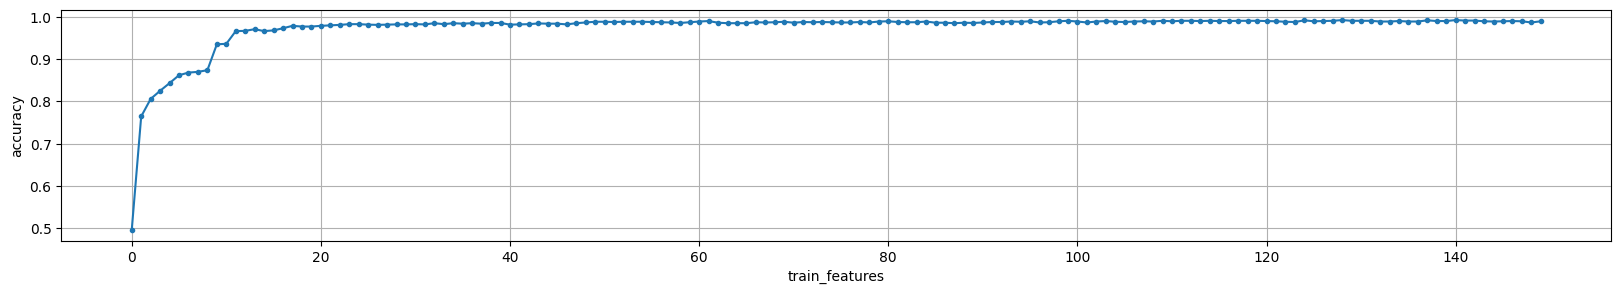

In [151]:
# accuracy_score 누적 결과 시각화
## accuracy_score 누적한 acc 변수를 plt.plot 함수를 사용하여 시각화 합니다.

plt.figure( figsize= (20,3))
plt.plot(acc['accuracy_score'], marker ='.' )
plt.xlabel('train_features')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [152]:
# 최고 정확도 Feature 개수 찾기

## agg 변수를 accuracy_score 기준 내림차순으로 정렬 합니다.(인덱스 재설정X)

## 인덱스 번호는 누적 학습된 feature의 개수 입니다.

## accuracy_score 값으로 내림차순 정렬 후 이 가장 첫번째 인덱스 번호가 가장 정확도가 좋은 feature 개수를 뜻합니다.

acc.sort_values('accuracy_score', ascending = False, inplace =True)
acc

accuracy_score
128        0.992068
140        0.992068
124        0.991501
137        0.991501
142        0.990935
..              ...
4          0.843059
3          0.824929
2          0.805666
1          0.764306
0          0.495751

[150 rows x 1 columns]

In [153]:
# 최고 정확도 Feature명 저장

## acc 에서 확인한 최고 결과 feature 개수 만큼 importance_sort['feature_name']를 슬라이싱 하여 importance_top 변수에 할당 합니다.

## 정확도 최고치 인덱스 값 +1 해서 슬라이싱 하세요.

## [TIP] 슬라이싱 할때 [:1] -> feature 0번 까지 짤림, [:100] -> feature 99번 까지 짤림

importance_top = importance_sort['feature_name'][0:128+1]
importance_top

0           angle(X,gravityMean)
1              tBodyAccMag-std()
2          fBodyAcc-skewness()-X
3              fBodyAccMag-std()
4      tGravityAcc-arCoeff()-Z,1
                 ...            
124            fBodyGyro-max()-Y
125       tBodyAcc-arCoeff()-X,4
126         fBodyAccJerk-iqr()-X
127       fBodyGyro-kurtosis()-Z
128            tBodyGyro-iqr()-Y
Name: feature_name, Length: 129, dtype: object

##### < importance_top.csv > 중요 feature 저장

##### < importance_top > 중요 feature 모음

In [154]:
# 중요 feature 저장

# importance_top 변수를 인덱스 미포함하여 'importance_top.csv' 파일로 저장 합니다.

# 저장경로는 현재 경로의 하위 './data' 폴더로 지정해 주세요.

importance_top.to_csv('./data/importance_top.csv', index = False)

In [155]:
display(os.listdir('./data'))

['features 설명.xlsx',
 'features.csv',
 'importance_top.csv',
 'result3.csv',
 'result4.csv',
 'train_data.csv']

##### < x_train_top > 최고 훈련 데이터  
##### < x_val_top > 최고 학습 데이터

In [156]:
# 훈련 데이터 생성

# x_train_top 변수에 x_train을 중요 feature 만큼 슬라이싱 한 x_train[importance_top] 할당

# x_val_top 변수에 x_val을 중요 feature 만큼 슬라이싱 한 x_val[importance_top] 할당

x_train_top = x_train[importance_top]

x_val_top = x_val[importance_top]

##### < hpt_xgb_top_model > 최고 모델

##### < hpt_xgb_top_pred > 최고 예측 모델

In [157]:
# 베스트 feature 개수 적용 모델링

## XGBClassifier 모듈에 베스트 파라미터를 적용하여 모델을 생성 및 초기화 합니다.

## 파라미터는 params 변수에 사용된 파라미터와, random_state=2023 으로 설정해 주세요.

## 이때 생성한 모델을 hpt_xgb_top_model 변수에 할당 합니다.

## 모델이 생성되면 최적의 feature 개수만 선별한 x_train_top 데이터와 y_train 으로 모델을 학습시켜 줍니다.

## 모델 학습이 완료되면 x_val_top의 결과를 예측하고 결과를 hpt_xgb_top_pred 변수에 할당 합니다.

hpt_xgb_top_model = XGBClassifier(learning_rate= 0.3, max_depth= 2, random_state=2023)

hpt_xgb_top_model.fit(x_train_top, y_train)

hpt_xgb_top_pred = hpt_xgb_top_model.predict(x_val_top)

hpt_xgb_top_pred

array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [158]:
# hpt_xgb_top_model 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report

print("accuracy_score:", accuracy_score( y_val,hpt_xgb_top_pred))

print("confusion_matrix:\n",confusion_matrix( y_val, hpt_xgb_top_pred))

print("confusion_matrix:\n",classification_report( y_val, hpt_xgb_top_pred))

accuracy_score: 0.9926345609065156
confusion_matrix:
 [[319   7   0   0   0   0]
 [  4 324   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   0   0 271   0   0]
 [  0   0   0   0 254   0]
 [  0   0   0   1   1 230]]
confusion_matrix:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       326
           1       0.98      0.99      0.98       328
           2       1.00      1.00      1.00       354
           3       1.00      1.00      1.00       271
           4       1.00      1.00      1.00       254
           5       1.00      0.99      1.00       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [159]:
# hpt_xgb_top_model 예측결과 저장

## result 데이터프레임 8번 인덱스에 'hpt_xgb_top'(모델명), 'train'(검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.

## f1_score의 평균은 'macro' 파라미터를 사용 합니다.

## 예측 결과가 잘 할당 되었는지 확인해 주세요.

In [160]:
result

model_name valid_data  accuracy_score  f1_score
0          svc      train        0.942776  0.945949
1           lr      train        0.980170  0.981491
2          knn      train        0.942776  0.963997
3          gbc      train        0.980737  0.982430
4          xgb      train        0.987535  0.988406
5      hpt_xgb      train        0.992068  0.992707
6  hpt_xgb_150      train        0.989235  0.989286
7   hpt_xgb_50      train        0.988102  0.988090
8      hpt_xgb      train        0.992635  0.993037

In [161]:
result.loc[8] = ["hpt_xgb","train", accuracy_score( y_val,hpt_xgb_top_pred), f1_score( y_val,hpt_xgb_top_pred, average='macro')]
result

model_name valid_data  accuracy_score  f1_score
0          svc      train        0.942776  0.945949
1           lr      train        0.980170  0.981491
2          knn      train        0.942776  0.963997
3          gbc      train        0.980737  0.982430
4          xgb      train        0.987535  0.988406
5      hpt_xgb      train        0.992068  0.992707
6  hpt_xgb_150      train        0.989235  0.989286
7   hpt_xgb_50      train        0.988102  0.988090
8      hpt_xgb      train        0.992635  0.993037

---
---

### (4) 결과 저장 및 시각화

In [162]:
# 결과 저장

# result 변수를 인덱스 미포함하여 'result4.csv' 파일로 저장 합니다.

# 저장경로는 현재 경로의 하위 './data' 폴더로 지정해 주세요.

result.to_csv('./data/result4.csv', index=False)

os.listdir('./data')

['features 설명.xlsx',
 'features.csv',
 'importance_top.csv',
 'result3.csv',
 'result4.csv',
 'train_data.csv']

##### < save_check > 로드한 데이터 

In [163]:
# 저장 여부 확인

## 데이터가 파일로 잘 저장 되었는지 result4.csv 파일을 로드하여 확인 합니다.

## 로드한 데이터는 save_check 변수에 할당해 주세요.

os.listdir('./data')

save_check = pd.read_csv('./data/result4.csv')
save_check

model_name valid_data  accuracy_score  f1_score
0          svc      train        0.942776  0.945949
1           lr      train        0.980170  0.981491
2          knn      train        0.942776  0.963997
3          gbc      train        0.980737  0.982430
4          xgb      train        0.987535  0.988406
5      hpt_xgb      train        0.992068  0.992707
6  hpt_xgb_150      train        0.989235  0.989286
7   hpt_xgb_50      train        0.988102  0.988090
8      hpt_xgb      train        0.992635  0.993037

*  model_name 별 accuracy_score, f1_score 시각화(수직 그래프) 


In [164]:
# 컬럼-인덱스 변환
## save_check 데이터 프레임의 ['model_name', 'valid_data'] 컬럼을 지정하여 인덱스로 설정해 줍니다.
## 변환한 값은 result_comp 변수에 할당해 주세요.
result_comp = save_check.set_index( ['model_name', 'valid_data'] )
result_comp

accuracy_score  f1_score
model_name  valid_data                          
svc         train             0.942776  0.945949
lr          train             0.980170  0.981491
knn         train             0.942776  0.963997
gbc         train             0.980737  0.982430
xgb         train             0.987535  0.988406
hpt_xgb     train             0.992068  0.992707
hpt_xgb_150 train             0.989235  0.989286
hpt_xgb_50  train             0.988102  0.988090
hpt_xgb     train             0.992635  0.993037

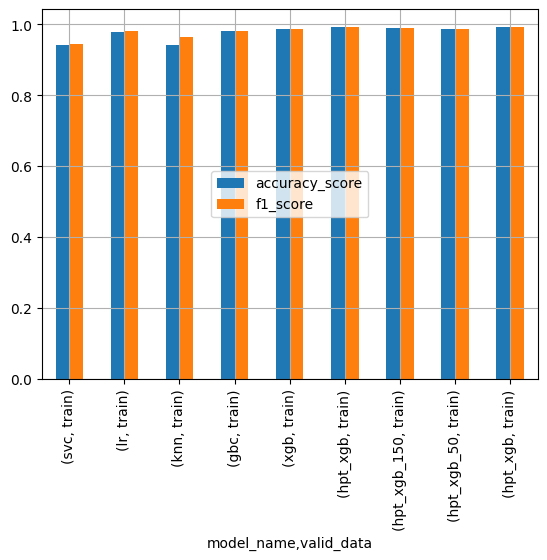

In [165]:
# 모델별 결과 시각화

# pandas의 plot 함수을 사용하여 AI모델 별 accuracy_score, f1_score 수직 그래프 시각화 합니다.

# grid를 추가해 주세요.

# legend를 표시하고, 위치는 center 입니다.

import pandas as pd

result_comp.plot(kind = 'bar')

plt.legend(loc='center')

plt.grid()

plt.show()

##### 모델 저장

In [166]:
## 모델 저장하기
## 오늘 만들었던 최고 성능의 모델과 학습 데이터를 저장 합니다.
## 아래의 코드에서 한글로 씌여진 곳에 본인이 생성한 변수명을 기입해 주세요.

import joblib 
# joblib.dump(최고의 모델, 'hpt_xgb_top_model.pkl')
# joblib.dump(중요 feature명 모음, 'importance_top.pkl')
# joblib.dump(최종 학습 X 데이터, 'x_train_top.pkl')
# joblib.dump(최종 학습 Y 데이터, 'y_train.pkl')

# 작성 예시

joblib.dump(hpt_xgb_top_model, 'hpt_xgb_top_model.pkl')

joblib.dump(importance_top, 'importance_top.pkl')

joblib.dump(x_train_top, 'x_train_top.pkl')

joblib.dump(y_train, 'y_train.pkl')

['y_train.pkl']

In [167]:
# 저장 확인
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '4기 DX 미프3_지도학습_교안_2일차.pdf',
 'data',
 'hpt_xgb_top_model.pkl',
 'importance_top.pkl',
 'x_train_top.pkl',
 'y_train.pkl',
 '미프3차_A레벨_과제3-답안.ipynb',
 '미프3차_A레벨_과제3.ipynb',
 '미프3차_A레벨_과제4-Copy1.ipynb',
 '미프3차_A레벨_과제4-답안.ipynb',
 '미프3차_A레벨_과제4.ipynb',
 '미프3차_A레벨_과제4_표수혁.ipynb',
 '미프3차_B레벨_과제3.ipynb',
 '미프3차_B레벨_과제4.ipynb']

----------

## 수고하셨습니다

----------